In [3]:
import numpy as np
from time import time
import os
import sys
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants

import BigBadBrain as bbb

In [104]:

with open('/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/fictrac-20190226_124612.dat','r') as f:
            df = pd.DataFrame(l.rstrip().split() for l in f)

            # Name columns
            df = df.rename(index=str, columns={0: 'frameCounter',
                                           1: 'dRotCamX',
                                           2: 'dRotCamY',
                                           3: 'dRotCamZ',
                                           4: 'dRotScore',
                                           5: 'dRotLabX',
                                           6: 'dRotLabY',
                                           7: 'dRotLabZ',
                                           8: 'AbsRotCamX',
                                           9: 'AbsRotCamY',
                                           10: 'AbsRotCamZ',
                                           11: 'AbsRotLabX',
                                           12: 'AbsRotLabY',
                                           13: 'AbsRotLabZ',
                                           14: 'positionX',
                                           15: 'positionY',
                                           16: 'heading',
                                           17: 'runningDir',
                                           18: 'speed',
                                           19: 'integratedX',
                                           20: 'integratedY',
                                           21: 'timeStamp',
                                           22: 'sequence'})

            # Remove commas
            for column in df.columns.values[:-1]:
                df[column] = [float(x[:-1]) for x in df[column]]

            fictrac = df

In [4]:
test1 = np.zeros((100,10))
test2 = np.ones((100,10))
test3 = [test1, test2]
out = np.concatenate(test3,axis=1)

In [5]:
out.shape

(100, 20)

In [6]:
folder = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25'

In [7]:
fictrac = load_fictrac(folder)


~~ load_fictrac ~~
load_fictrac done. Duration: 3.10 sec


In [9]:
x = np.arange(0,1800,0.02)

In [56]:
#a sigma of 10 is 200ms

90000

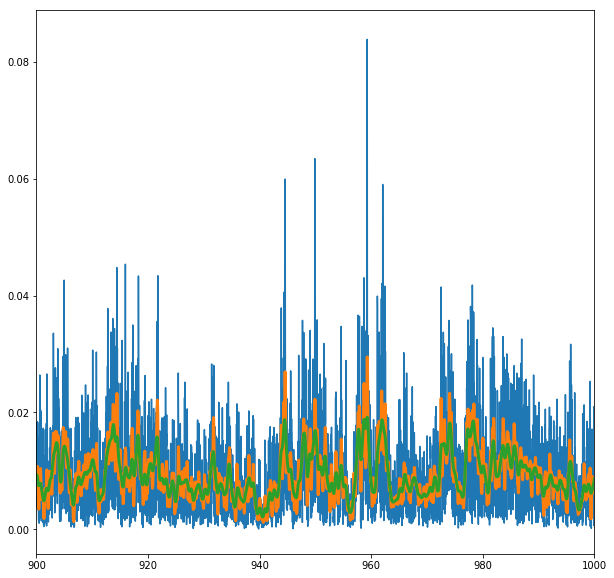

In [11]:
behavior = 'speed'

fictrac_numpy = np.asarray(fictrac[behavior])
fictrac_smoothed = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac[behavior]),sigma=3)
fictrac_smoothed_more = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac[behavior]),sigma=10)


plt.figure(figsize=(10,10))
plt.plot(x,fictrac_numpy)
plt.plot(x,fictrac_smoothed,linewidth=3)
plt.plot(x,fictrac_smoothed_more,linewidth=3)

plt.xlim(900,1000)
plt.show()

In [16]:
dx = np.asarray(fictrac['dRotLabX'])
dy = np.asarray(fictrac['dRotLabY'])
dz = np.asarray(fictrac['dRotLabZ'])

In [32]:
dx = scipy.ndimage.filters.gaussian_filter(dx,sigma=3)
dy = scipy.ndimage.filters.gaussian_filter(dy,sigma=3)


In [33]:
d = np.sqrt(dx*dx + dy*dy)


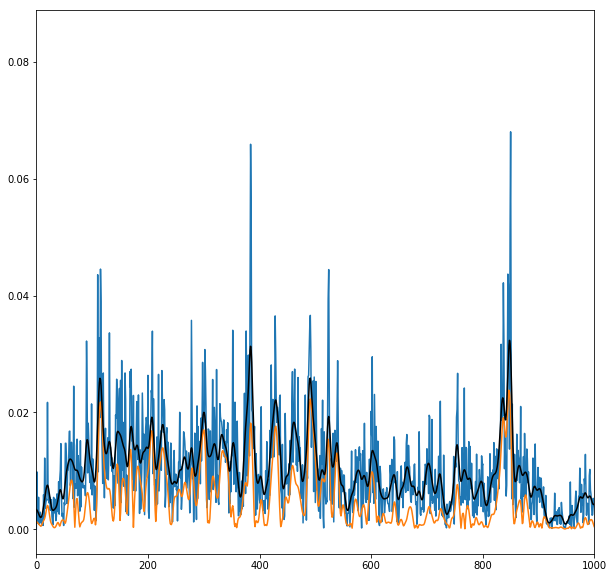

In [38]:
plt.figure(figsize=(10,10))

plt.plot(np.asarray(fictrac['speed']))
plt.plot(d)
plt.plot(fictrac_smoothed,color='k')
plt.xlim(0,1000)
plt.show()

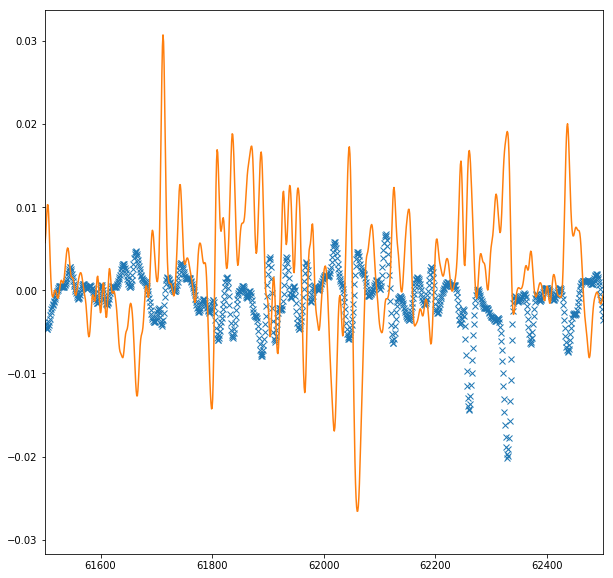

In [61]:
plt.figure(figsize=(10,10))

plt.plot(dx,'x')
plt.plot(dy)

plt.xlim(61500,62500)
plt.show()

In [54]:
90000/50


1800.0

In [55]:
1000/50

20.0

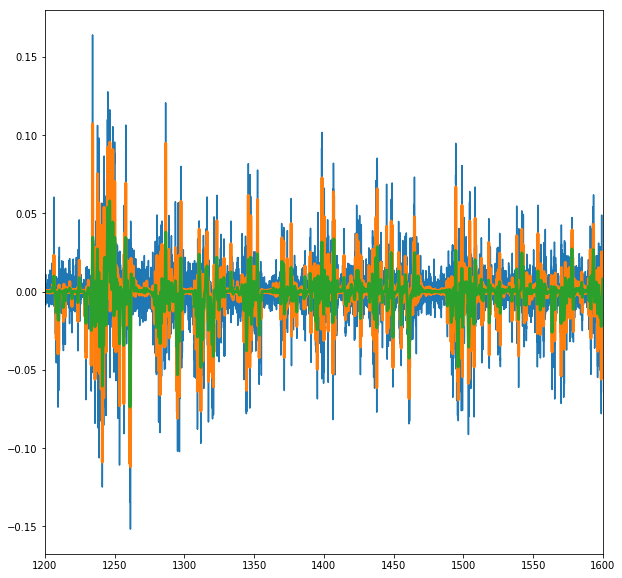

In [88]:
behavior = 'dRotLabZ'

fictrac_numpy = np.asarray(fictrac[behavior])
fictrac_smoothed = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac[behavior]),sigma=3)
fictrac_smoothed_more = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac[behavior]),sigma=10)


plt.figure(figsize=(10,10))
plt.plot(x,fictrac_numpy)
plt.plot(x,fictrac_smoothed,linewidth=3)
plt.plot(x,fictrac_smoothed_more,linewidth=3)
plt.xlim(1200,1600)
plt.show()

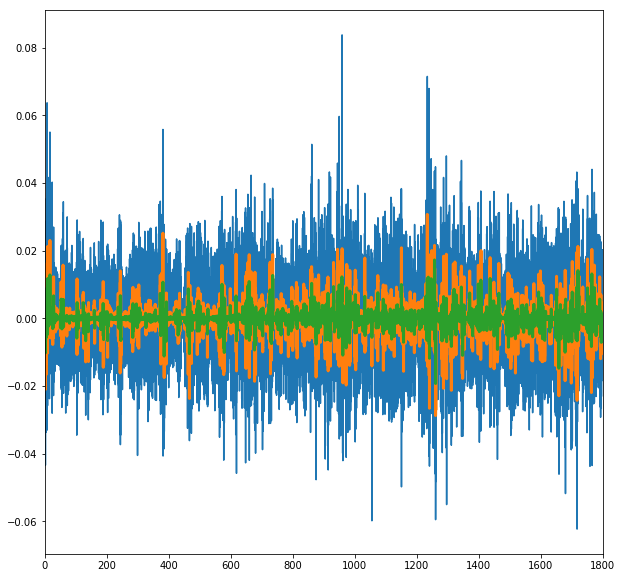

In [91]:
behavior = 'dRotLabY'

fictrac_numpy = np.asarray(fictrac[behavior])
fictrac_smoothed = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac[behavior]),sigma=3)
fictrac_smoothed_more = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac[behavior]),sigma=10)

plt.figure(figsize=(10,10))
plt.plot(x,fictrac_numpy)
plt.plot(x,fictrac_smoothed,linewidth=3)
plt.plot(x,fictrac_smoothed_more,linewidth=3)

plt.xlim(0,1800)
plt.show()

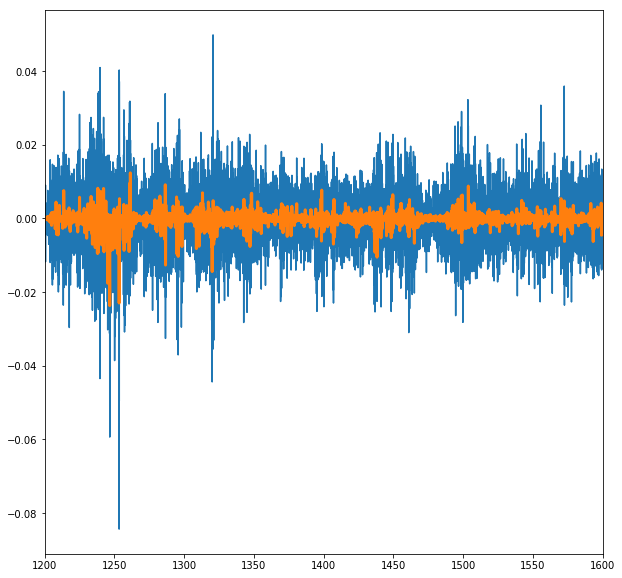

In [87]:
behavior = 'dRotLabX'

fictrac_numpy = np.asarray(fictrac[behavior])
fictrac_smoothed = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac[behavior]),sigma=3)

plt.figure(figsize=(10,10))
plt.plot(x,fictrac_numpy)
plt.plot(x,fictrac_smoothed,linewidth=3)
plt.xlim(1200,1600)
plt.show()

In [119]:
x_rot = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac['dRotLabX']),sigma=10)
y_rot = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac['dRotLabY']),sigma=10)
z_rot = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac['dRotLabZ']),sigma=10)
speed = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac['speed']),sigma=10)

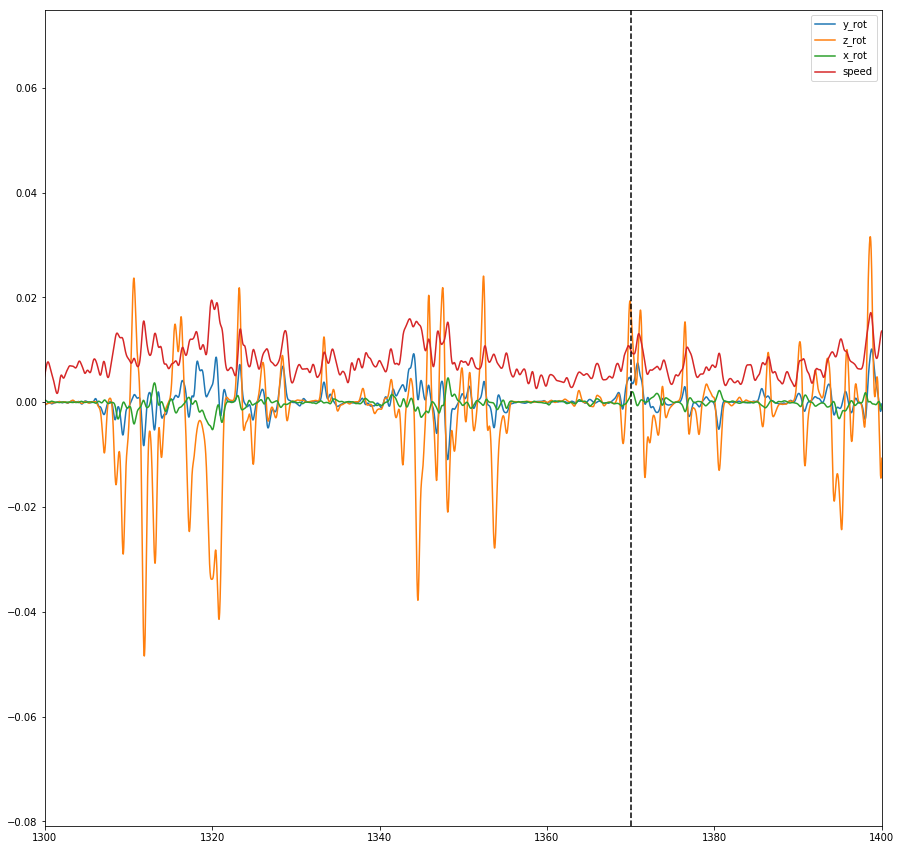

In [120]:
plt.figure(figsize=(15,15))
plt.plot(x,y_rot,label='y_rot')
plt.plot(x,z_rot,label='z_rot')
plt.plot(x,x_rot,label='x_rot')
plt.plot(x,speed,label='speed')
plt.axvline(1370,color='k',linestyle='--')
plt.legend()
plt.xlim(1300,1400)
plt.show()

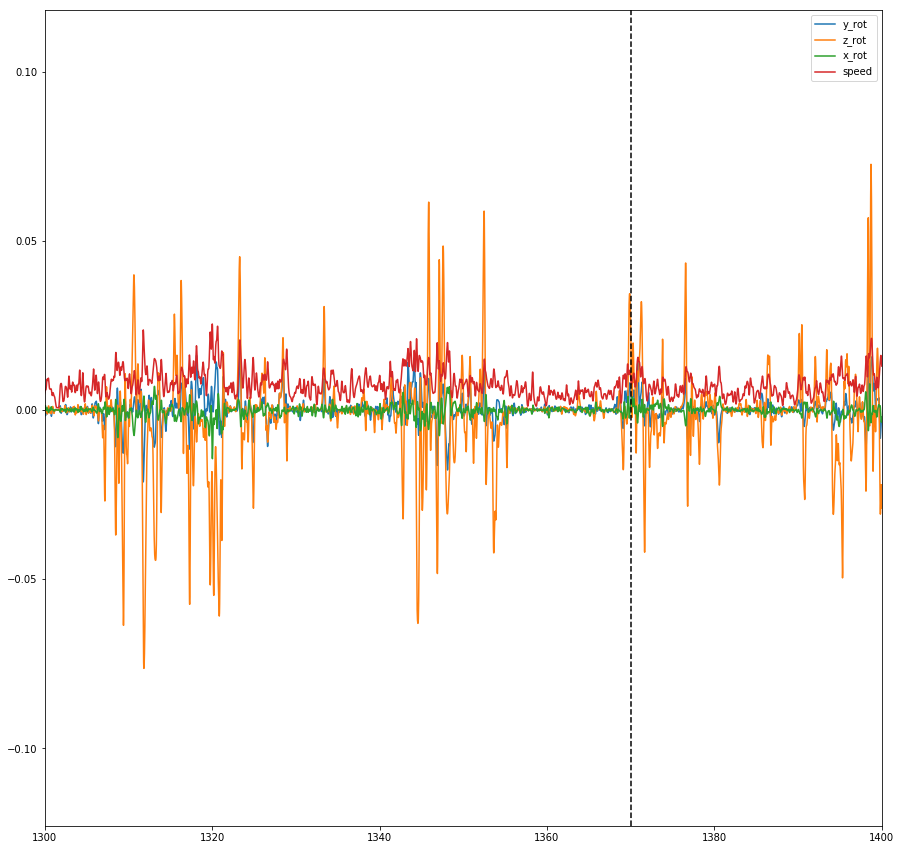

In [14]:
sigma=3
x_rot = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac['dRotLabX']),sigma=sigma)
y_rot = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac['dRotLabY']),sigma=sigma)
z_rot = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac['dRotLabZ']),sigma=sigma)
speed = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac['speed']),sigma=sigma)

plt.figure(figsize=(15,15))
plt.plot(x,y_rot,label='y_rot')
plt.plot(x,z_rot,label='z_rot')
plt.plot(x,x_rot,label='x_rot')
plt.plot(x,speed,label='speed')
plt.axvline(1370,color='k',linestyle='--')
plt.legend()
plt.xlim(1300,1400)
plt.show()

In [24]:
temp

array([0.0, 0.0097957429561484, 0.0017900211734733, ...,
       0.0031471912648939, 0.0033692559784673, 0.0049803114783234],
      dtype=object)

In [17]:
plt.figure(figsize=(10,10))
plt.plot(fictrac_numpy[:,18])
plt.plot(,sigma=3))
plt.xlim(40000,42000)
plt.show()

RuntimeError: array type dtype('O') not supported